Importação das Bibliotecas

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

Dados de Máquinas agrícolas nos últimos 36 meses

In [19]:
dados = [
    52, 50, 36, 40, 30, 42, 38, 38, 52, 44, 36, 34,
    50, 42, 34, 55, 36, 55, 42, 52, 34, 48, 55, 44,
    44, 30, 48, 40, 40, 44, 40, 44, 38, 36, 50, 42,
]

Estatísticas Descritivas

In [20]:
media = np.mean(dados)
desvio = np.std(dados, ddof=1)

In [21]:
print("Média: ", f"{media:.6f}")
print("Erro padrão: ", f"{stats.sem(dados):.6f}")
print("Desvio padrão: ", f"{desvio:.6f}")
print("Variância: ", f"{np.var(dados, ddof=1):.6f}")
print("Mínimo: ", np.min(dados))
print("Máximo: ", np.max(dados))
print("Soma: ", np.sum(dados))
print("Contagem: ", len(dados))

Média:  42.638889
Erro padrão:  1.183318
Desvio padrão:  7.099911
Variância:  50.408730
Mínimo:  30
Máximo:  55
Soma:  1535
Contagem:  36


Comparação com os resultados do pdf disponibilizado

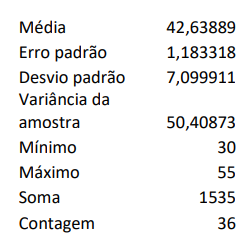

# Teste de Kolmogorov-Smirnov

O Teste de Kolmogorov-Smirnov é utilizado para verificar a aderência de uma amostra a uma distribuição específica. Neste caso, estamos testando se a produção segue uma distribuição normal.

## Hipóteses

- **Hipótese Nula (H0)**: A produção segue uma distribuição normal N(mu, sigma).
- **Hipótese Alternativa (H1)**: A produção não segue uma distribuição normal N(mu, sigma).


In [22]:
alfa = 0.05 #Nível de significância
Dc = 0.23 #Valor critico da estatística de Kolmogorov-Smirnov

Cálculo do Teste

stats.kstest: é a função do módulo scipy.stats que executa o teste KS para uma amostra contra uma distribuição teórica.

dados: é o array ou lista com os dados amostrais que você quer testar.

'norm': é o nome da distribuição teórica contra a qual você está comparando seus dados. No caso, 'norm' é a normal padrão de scipy.stats.

args=(media, desvio): são os parâmetros da distribuição normal que você está especificando.
Ou seja, media é a média e desvio é o desvio padrão da normal teórica que você está usando para comparar com seus dados.

D_calculado: é o valor da estatística KS calculada — ele mede a maior diferença entre a CDF (função de distribuição acumulada) empírica dos dados e a CDF teórica da normal.

p_valor: é o valor-p associado ao teste.
Se p_valor for pequeno (tipicamente menor que 0,05), rejeita-se a hipótese nula de que os dados seguem aquela distribuição.

In [23]:
D_calculado, p_valor = stats.kstest(dados, 'norm', args=(media, desvio))

Resultado do Teste de Kolmogorov-Smirnov

In [27]:
print("Estatística D calculada: ", f"{D_calculado:.3f}")
print("p-valor: ", f"{p_valor:.2f}")
print("Valor crítico (Dc): ", f"{Dc:.2f}")

Estatística D calculada:  0.118
p-valor:  0.65
Valor crítico (Dc):  0.23


In [25]:
if D_calculado < Dc:
    print("Não rejeitamos H0. A amostra pode ser considerada proveniente de uma população com distribuição normal.")
else:
    print("Rejeitamos H0. A amostra NÃO pode ser considerada proveniente de uma população com distribuição normal.")

Não rejeitamos H0. A amostra pode ser considerada proveniente de uma população com distribuição normal.


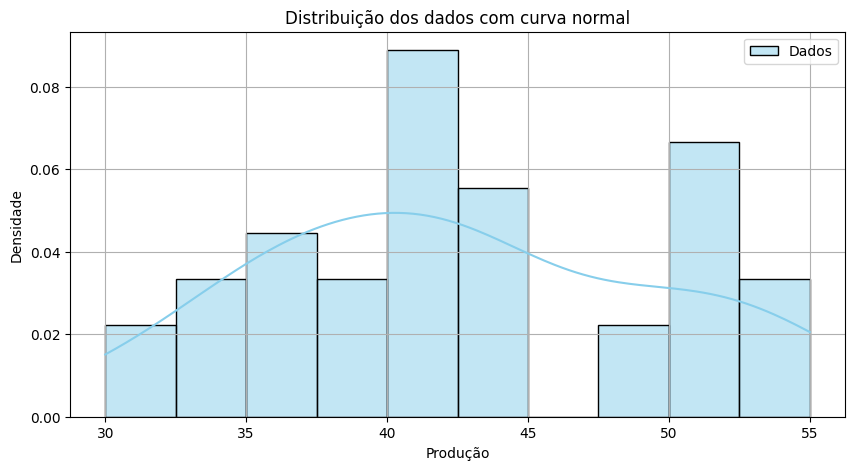

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(dados, kde=True, stat="density", bins=10, color="skyblue", label="Dados")

plt.title("Distribuição dos dados com curva normal")
plt.xlabel("Produção")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()